/home/sergio/anaconda3/envs/zip35/lib/python3.5/site-packages/empyrical/stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
/home/sergio/anaconda3/envs/zip35/lib/python3.5/site-packages/empyrical/stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


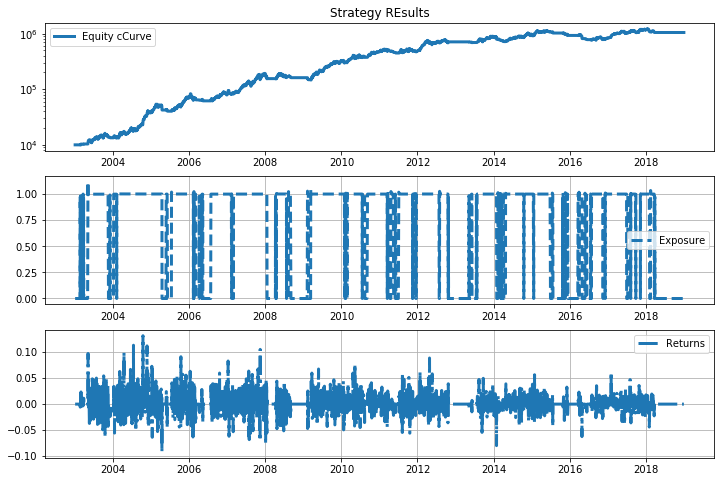

In [2]:
#import zipline functions
from zipline import run_algorithm
from zipline.api import order_target_percent, symbol

#importdata and time zone libraries

from datetime import datetime
import pytz

# visualization
import matplotlib.pyplot as plt

def initialize(context):
    #stock to trade
    context.stock = symbol('AAPL')
    
    #moving average
    context.index_average_window = 100
    
def handle_data(context, data):
    equities_hist = data.history( context.stock, "close", context.index_average_window, "1d" )
    
    if equities_hist[-1] > equities_hist.mean():
        stock_weight = 1.0
    else:
        stock_weight = 0.0
    
    #place order
    order_target_percent(context.stock, stock_weight)
    
def analyze(context, perf):
    fig = plt.figure(figsize=(12,8))
    
    #fisrt chart - Performance
    ax = fig.add_subplot(311)
    ax.set_title('Strategy REsults')
    ax.semilogy(perf['portfolio_value'], linestyle='-', label='Equity cCurve', linewidth=3.0)
    ax.legend()
    ax.grid(False)
    
    #second chart - leverage
    
    ax = fig.add_subplot(312)
    ax.plot( perf['gross_leverage'], linestyle='--', label='Exposure', linewidth=1.0)
    ax.legend()
    ax.grid(True)
    
    #third chart - Returns
    
    ax = fig.add_subplot(313)
    ax.plot( perf['returns'], linestyle='-.', label='Returns', linewidth=1.0)
    ax.legend()
    ax.grid(True)
    
    
begin_date = datetime(2003, 1, 1, tzinfo= pytz.UTC)
end_date = datetime(2018, 12, 31, tzinfo = pytz.UTC)
    
#fire off the backtest
    
results = run_algorithm(start=begin_date, 
                        end=end_date, 
                        initialize=initialize, 
                        capital_base=10000, 
                        handle_data=handle_data, 
                        analyze=analyze, 
                        data_frequency='daily', 
                        bundle='quandl')
            
